# Introduction

For this project, you will act as a data researcher for the World Health Organization. You will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.  

During this project, you will analyze, prepare, and plot data, and seek to answer questions in a meaningful way.

After you perform analysis, you'll be creating an article with your visualizations to be featured in the fictional "Time Magazine".

**Focusing Questions**: 
+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

GDP Source:[World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Step 1. Import Python Modules

In [1]:
import pandas as pd

import seaborn as sns

from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patheffects as path_effects


## Step 2 Prep The Data

To look for connections between GDP and life expectancy you will need to load the datasets into DataFrames so that they can be visualized.

Load **all_data.csv** into a DataFrame called `df`. Then, quickly inspect the DataFrame using `.head()`.

In [2]:
df = pd.read_csv('data/all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Step 3 Examine The Data

The datasets are large and it may be easier to view the entire dataset locally on your computer. You can open the CSV files directly from the folder you downloaded for this project.

Let's learn more about our data:
- GDP stands for **G**ross **D**omestic **P**roduct. GDP is a monetary measure of the market value of all final goods and services produced in a time period. 
- The GDP values are in current US dollars.

What six countries are represented in the data?

In [3]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


What years are represented in the data?

In [4]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


## Step 4 Tweak The DataFrame

Look at the column names of the DataFrame `df` using `.head()`. 

In [5]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


<i>--- Added Personal Task, (not a project task)</i>

In [6]:
print("""
-------------------------------------------------------------------------------------------------------------------------------
    -- info() output
------------------------------------------------------------------------------------------------------------------------------- 
""")

df.info()

print("""
-------------------------------------------------------------------------------------------------------------------------------
    -- Column names List
------------------------------------------------------------------------------------------------------------------------------- 
""")

print(df.columns.values)

print()


-------------------------------------------------------------------------------------------------------------------------------
    -- info() output
------------------------------------------------------------------------------------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.7+ KB

-------------------------------------------------------------------------------------------------------------------------------
    -- Column names List
------------------------

What do you notice? The first two column names are one word each, and the third is five words long! `Life expectancy at birth (years)` is descriptive, which will be good for labeling the axis, but a little difficult to wrangle for coding the plot itself. 

**Revise The DataFrame Part A:** 

Use Pandas to change the name of the last column to `LEABY`.
 </font>

In [7]:
df = df.rename(columns={'Life expectancy at birth (years)': 'LEABY'})

Run `df.head()` again to check your new column name worked.

In [8]:
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Step 5 Bar Charts To Compare Average

To take a first high level look at both datasets, create a bar chart for each DataFrame:

A) Create a bar chart from the data in `df` using `Country` on the x-axis and `GDP` on the y-axis. 

<i>--- Added Personal preference (not a project task)</i>

In [9]:
# GDP in Billions
df.GDP = df.GDP*1e-10

# United States of America name formated to USA
df.replace('United States of America', 'USA', inplace=True)

df.to_csv('data\edited_all_data.csv')
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093
1,Chile,2001,77.3,7.097992
2,Chile,2002,77.8,6.973681
3,Chile,2003,77.9,7.564346
4,Chile,2004,78.0,9.921039


<i>--- Added Personal Task, assign each country a color using a Seaborn color palette</i>

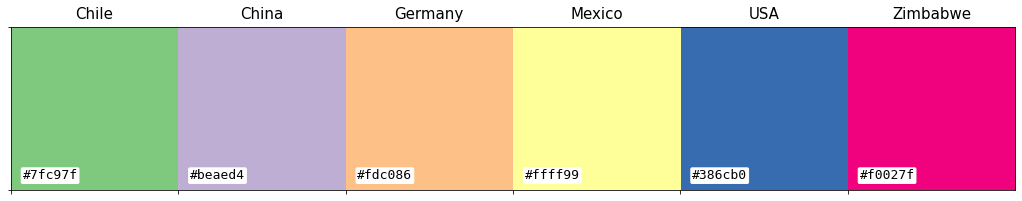

In [10]:
# create a list of hex color values from the Accent palette
pal = sns.color_palette('Accent').as_hex()

# create a DataFrame country color
df_country_color = pd.DataFrame({'country': df.Country.unique(),
                                'color_hex': list(map(lambda x: x , pal))[:6]})

# plot the first six colors of the Accent palette
sns.palplot(sns.color_palette(list(map(lambda x: x , pal))[:6]), size=3)

# Get current axis parameters (sns.palplot())
ax = plt.gca()

#----- Set Country name and hex color value text boxes yx locations and style
for i in range(len(df_country_color)):
    # plot country names 
    ax.text(i, -0.55, df_country_color.country.loc[i], 
            size=15, color='black', 
            ha='center')
     # plot color hex values
    ax.text(i-0.1, 0.45, 
            df_country_color.color_hex.loc[i], 
            ha='right',
            va='bottom',
            size=13, 
            color='black', 
            family='monospace',
            bbox=dict(facecolor='white', 
                     edgecolor='white', 
                     boxstyle='round, pad=0.1'))
    
# Note: save figure before using show(), if not the result is a blank image
plt.savefig('charts/color_country_chart.png')   
plt.show()

plt.close()

Average GDP chart

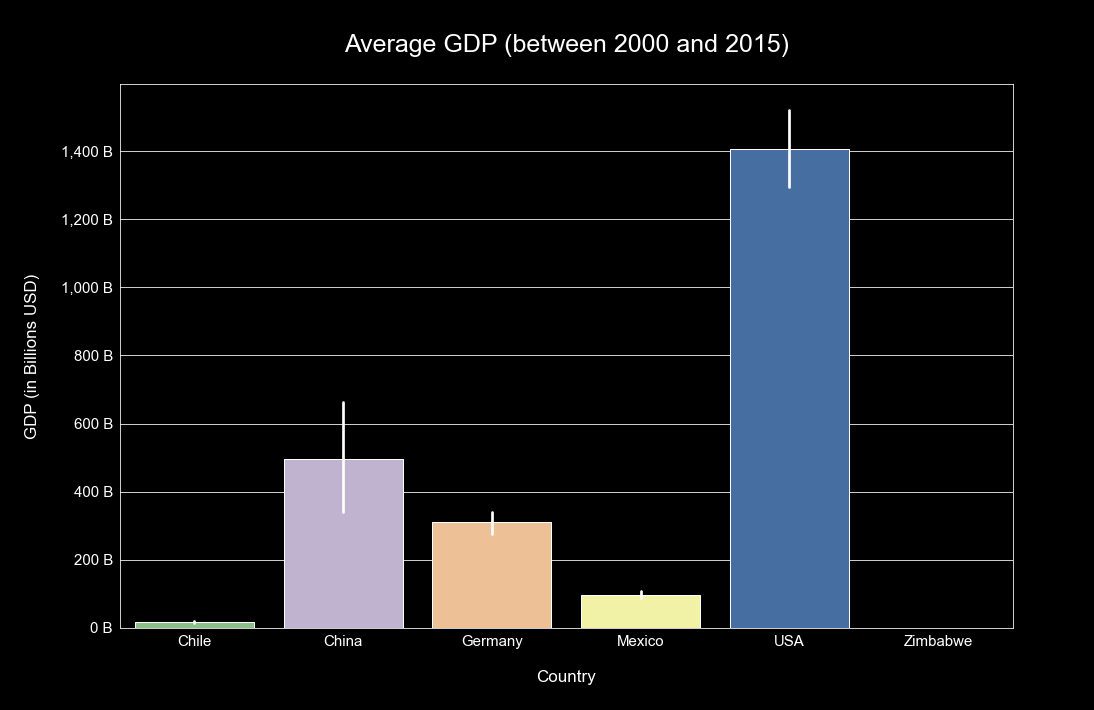

In [11]:
# Set color palette
sns.set_palette('Accent')

# Set style
sns.set_style('darkgrid', {'axes.facecolor':'black', 'figure.facecolor':'black'})

# Create figure
plt.figure(figsize=(16, 10))

# Use Seaborn to create the bar plot
ax = sns.barplot(data=df, x='Country', y='GDP', errcolor='white')

# Add a title
ax.set_title('\nAverage GDP (between 2000 and 2015)\n', fontsize=25, color='white')

# Label x and y axises
ax.set_xlabel('\nCountry\n', fontsize=17, color='white')
ax.set_ylabel('\nGDP (in Billions USD)\n', fontsize=17, color='white')

# Ticks
ax.tick_params(axis='both', colors='white', labelsize=15)
# Add billion unit
fmt = '{x:,.0f} B'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# place an empty text box in upper left axes coords, to match to the figure right padding  
ax.text(1.08, 1, ' ', transform=ax.transAxes, bbox=dict(facecolor='black', edgecolor='black'))

# Note: save figure before using show(), if not the result is a blank image
# also savefig overrides the facecolor for the background of the figure, need to save fg with .get_facecolor() 
plt.savefig('charts/avg_gdp_barchart.png', facecolor=ax.get_facecolor())
plt.show()

# Restore all RC params to default settings
sns.reset_defaults()
plt.close()

<i>-- Personal note:<br>
<i>Seaborn automatically displayed the average GDP per country between the years 2000 and 2015.</i>

In [12]:
# Countries average GDP
df_avg_period_15y_GDP = pd.DataFrame({'GDP_avg': df.groupby('Country')['GDP'].mean()}).reset_index()

df_avg_period_15y_GDP.to_csv('data/avg_period_15y_GDP.csv')

print('\nContries average GDPs, in the 15 years period 2000-20015:\n')

df_avg_period_15y_GDP.sort_values(by= 'GDP_avg', ascending=False).reset_index(drop=True).head(6)


Contries average GDPs, in the 15 years period 2000-20015:



,Country,GDP_avg
0,USA,1407.500000
1,China,495.771375
2,Germany,309.477562
3,Mexico,97.665063
4,Chile,16.978885
5,Zimbabwe,0.906258


<i>--- Added Personal Task, curious about Zimbabwe GDP.</i>

In [13]:
# Zimbawe dataframe
df_zimbabwe = df.loc[df.Country == 'Zimbabwe'].drop(columns=['Country']).reset_index(drop=True)
df_zimbabwe.to_csv('data/zimbabwe_data.csv')
df_zimbabwe.head(16)

,Year,LEABY,GDP
0,2000,46.0,0.668996
1,2001,45.3,0.677738
2,2002,44.8,0.634212
3,2003,44.5,0.572759
4,2004,44.3,0.580560
5,2005,44.6,0.575522
6,2006,45.4,0.544390
7,2007,46.6,0.529195
8,2008,48.2,0.441570
9,2009,50.0,0.862157


Visualizing Zimbabwe GDP by years, line graph.

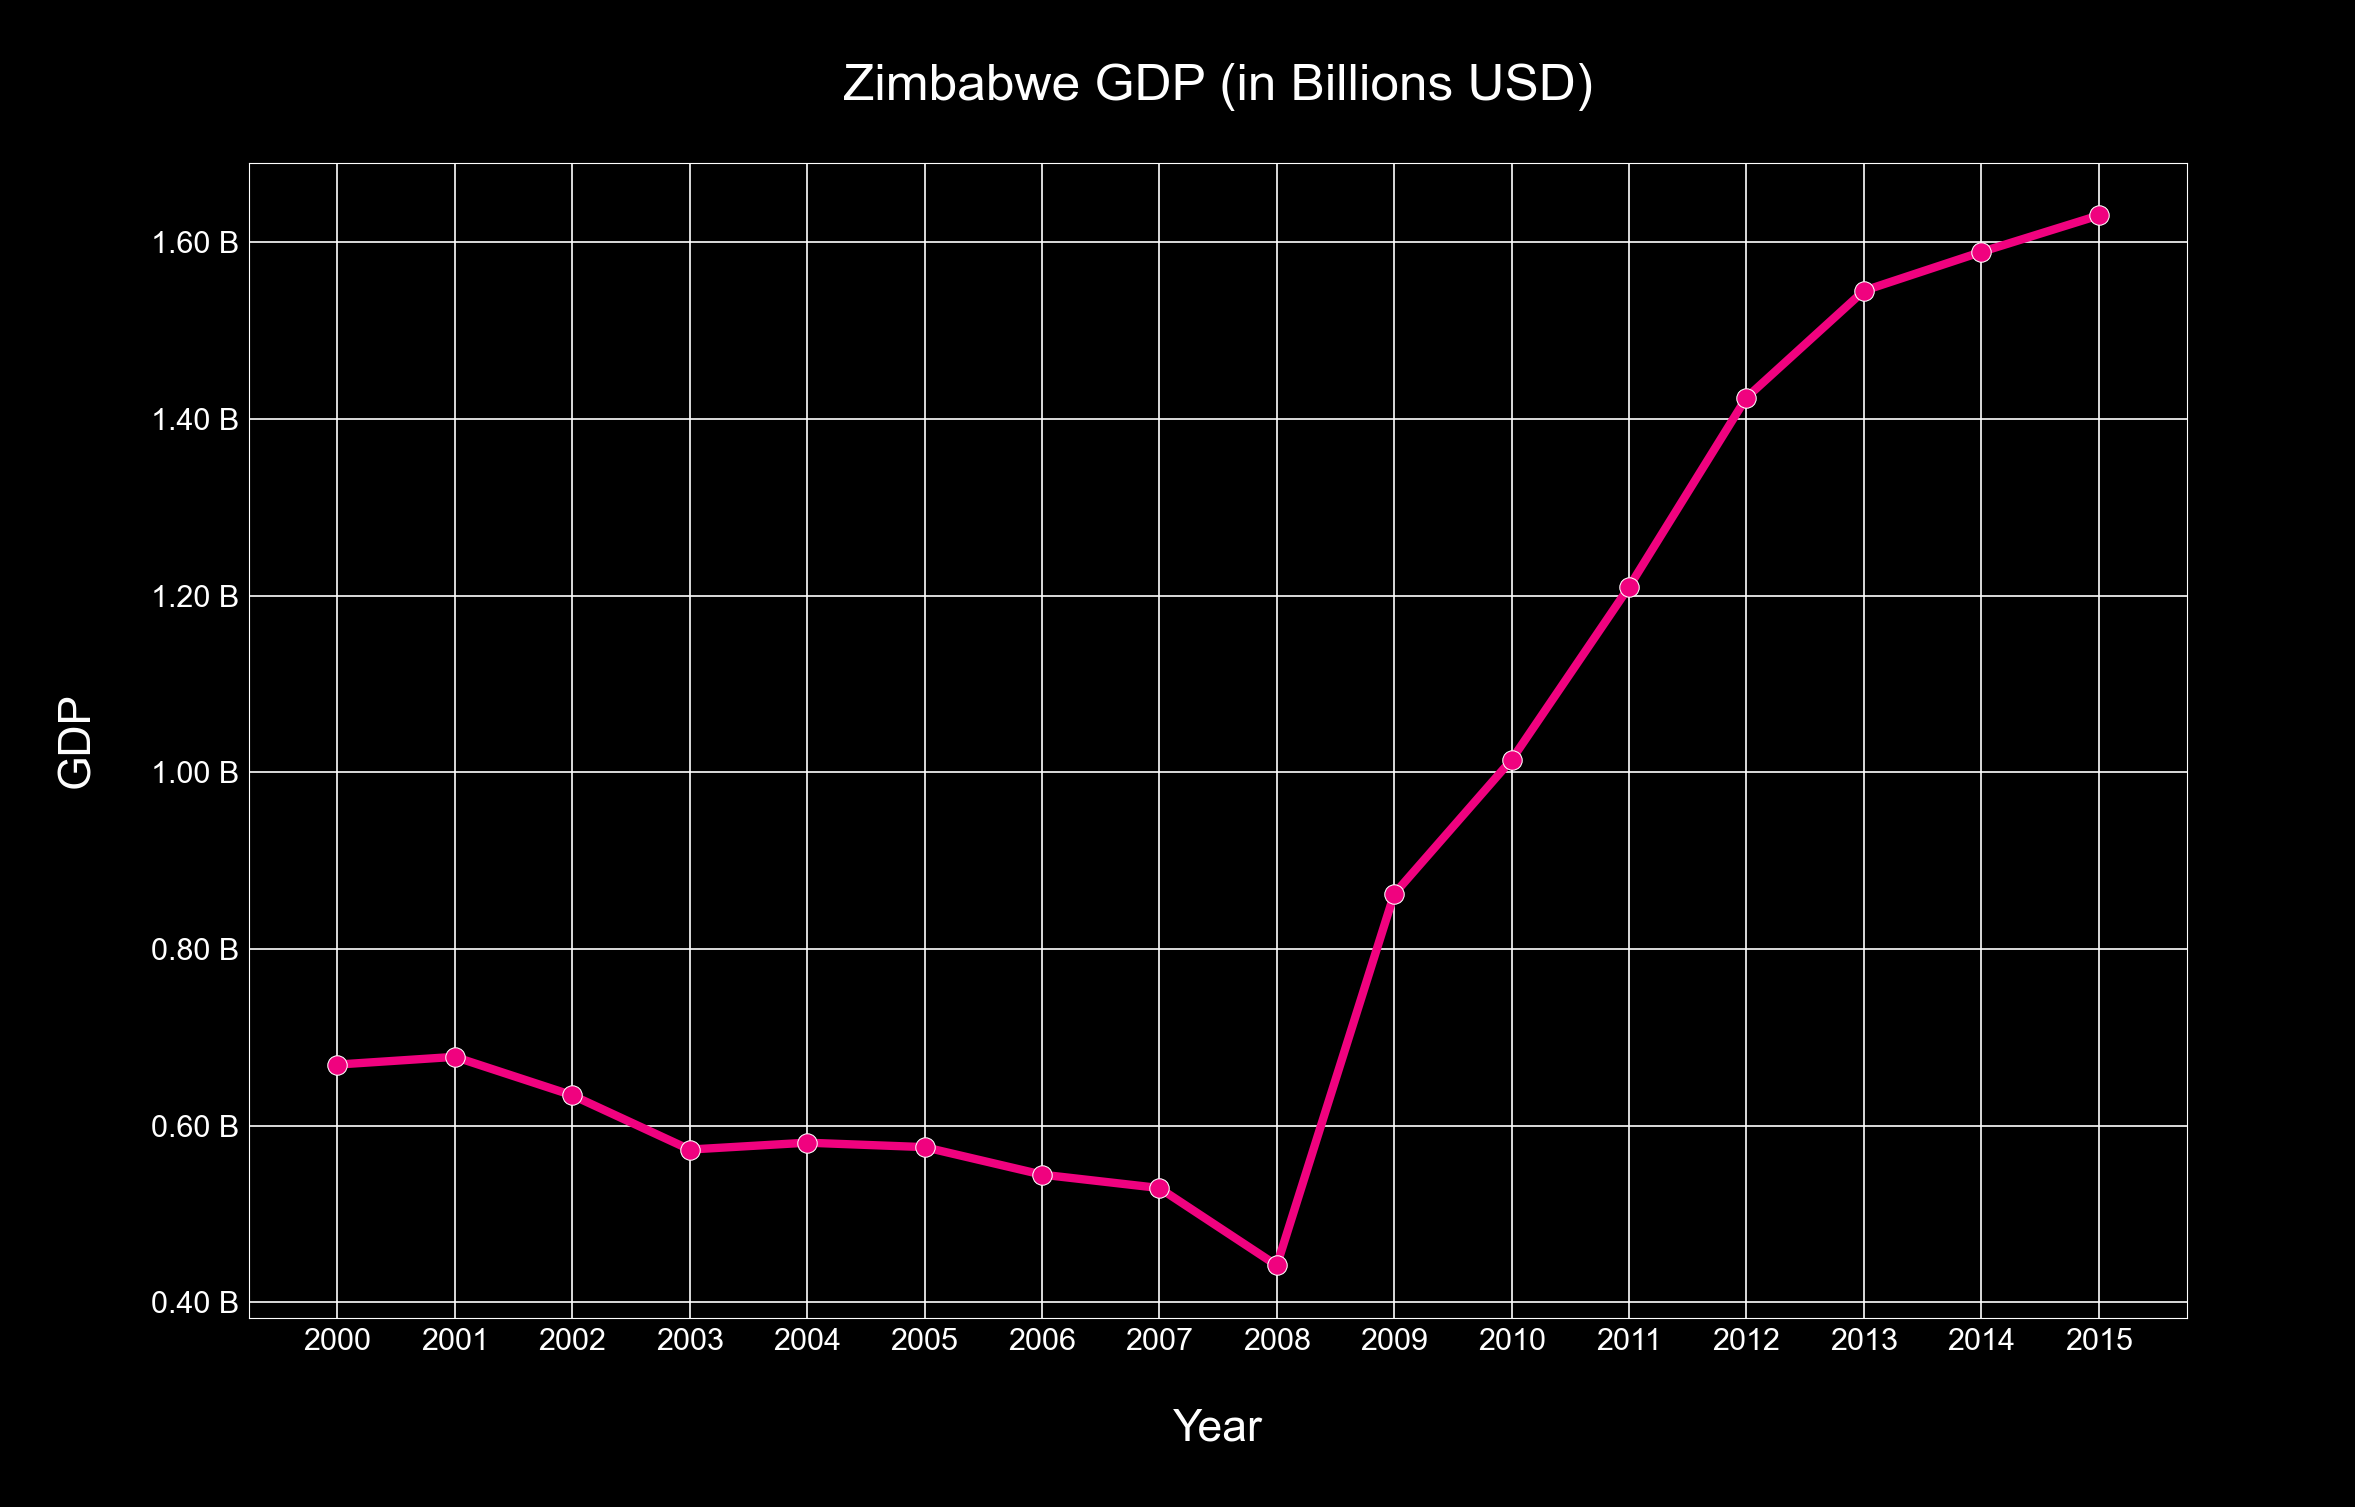

In [14]:
# Set style
sns.set_style('darkgrid', {'axes.facecolor':'black', 'figure.facecolor':'black'})

# Create figure 
plt.figure(figsize=(25, 15))

# Use Seaborn to create the bar plot
sns.set_context(rc={'grid.linewidth': 1.2, 'lines.linewidth': 6, 'lines.markersize': 14})
ax = sns.lineplot(data=df_zimbabwe, x='Year', y='GDP', marker='o', 
                  color=(df_country_color.color_hex[df_country_color['country']=='Zimbabwe'].values)[0], 
                  ci=None)

# Setting ticks
# ax = sns.lineplot(x='YEAR') displays every other year, formated x ticks to display every year
ax.set_xticks(df_zimbabwe.Year)
ax.tick_params(axis='both', colors='white', labelsize=22)
# Add billion unit
fmt = "{x:.2f} B"
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Add a title (using Matplotlib)
ax.set_title('\nZimbabwe GDP (in Billions USD)\n', fontsize=37, color='white')

# Label x and y axises (using Matplotlib)
ax.set_xlabel('\nYear\n', fontsize=32, color='white')
ax.set_ylabel('\nGDP\n', fontsize=32, color='white')

# place an empty text box in the upper left axes coords, to match to the figure right padding  
ax.text(1.08, 1, ' ', transform=ax.transAxes, bbox=dict(facecolor='black', edgecolor='black'))

# Note: save figure before using show(), if not the result is a blank image
# also savefig overrides the facecolor for the background of the figure, need to save fg with .get_facecolor() 
plt.savefig('charts/year_gdp_zimbabwe_linechart.png', facecolor=ax.get_facecolor())
plt.show()

# Restore all RC params to default settings
sns.reset_defaults()
plt.close()


From the year 2000 to the year 2008 add a declining GDP, but between <b>2008</b> and <b>2015</b> period Zimbabwe GDP grew %269.
   

In [15]:
# Zimbabwe growth rate in %
zim_gdp_2008 = df_zimbabwe.GDP[df.Year==2008].values
zim_gdp_2015 = df_zimbabwe.GDP[df.Year==2015].values

print('\nZimbabwe GDP between 2008 and 20015 grew:')
print(str(int(((zim_gdp_2015-zim_gdp_2008)/zim_gdp_2008)*100)) + "%\n")


Zimbabwe GDP between 2008 and 20015 grew:
269%



B) Create a bar chart using the data in `df` with `Country` on the x-axis and `LEABY` on the y-axis.
Remember to `plt.show()` your chart!

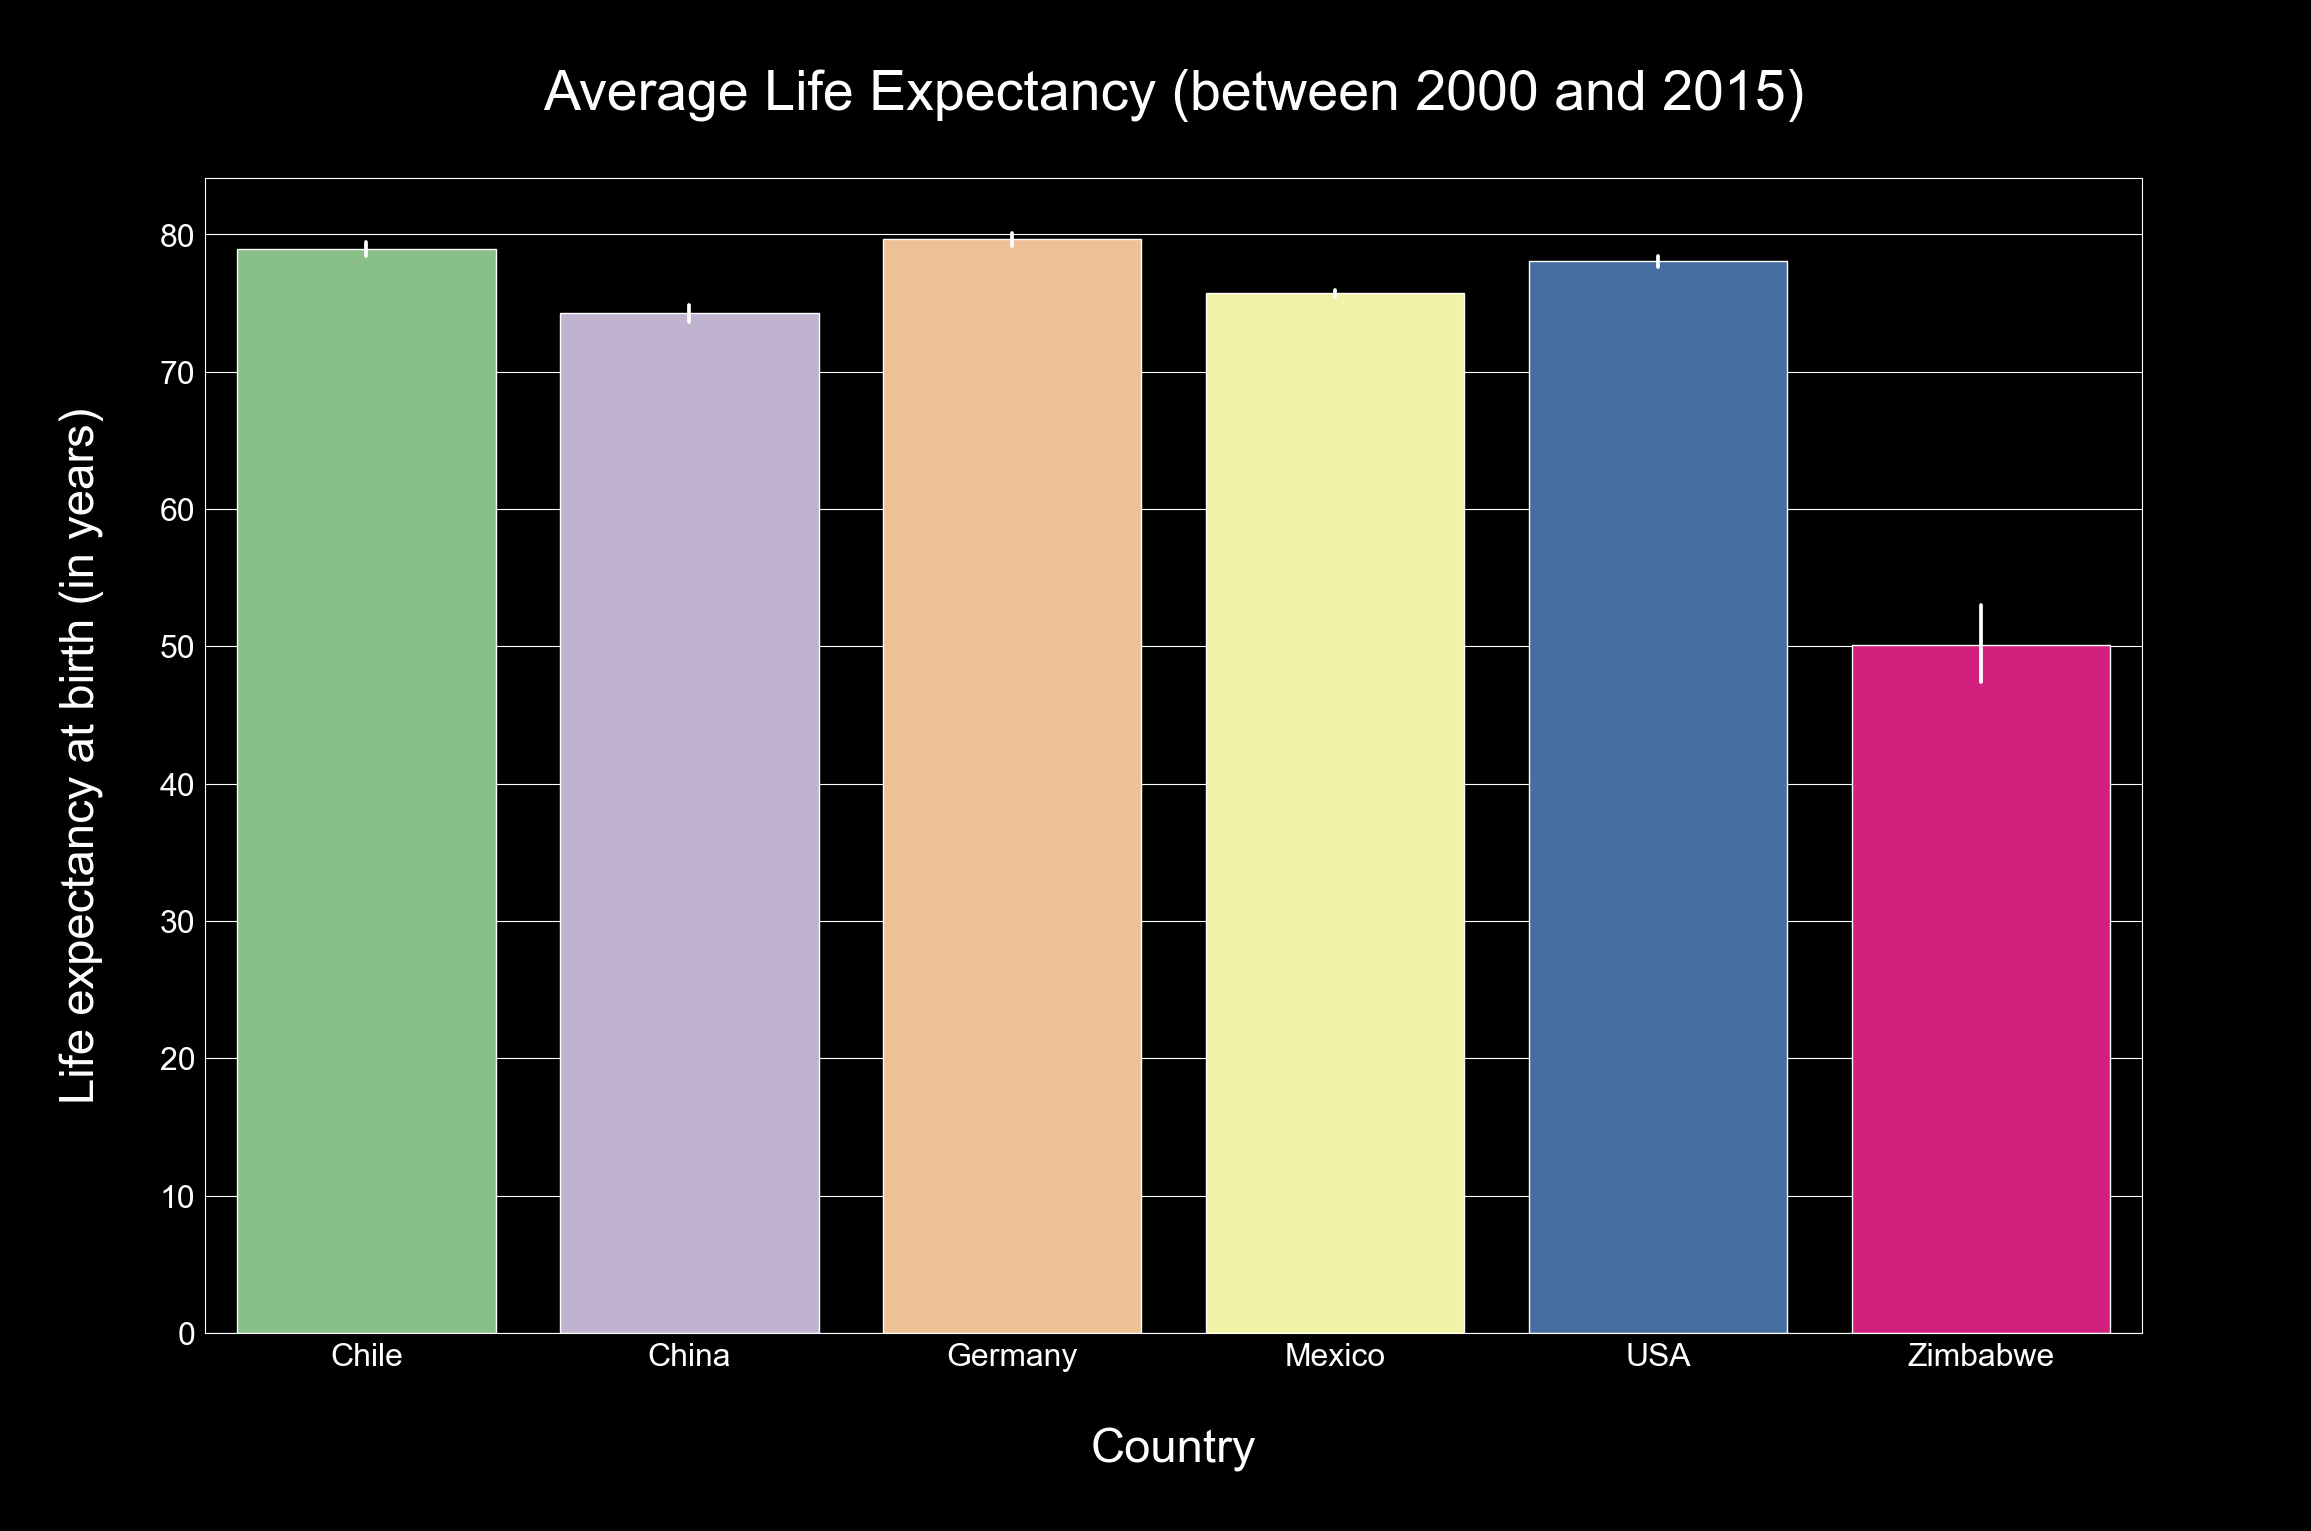

In [16]:
# Set color palette
sns.set_palette('Accent')

# Set style
sns.set_style('darkgrid', {'axes.facecolor':'black', 'figure.facecolor':'black'})

# Create figure 
plt.figure(figsize=(25, 15))

# Use Seaborn to create the bar plot
ax = sns.barplot(data=df, x='Country', y='LEABY', errcolor='white')

# Ticks
ax.tick_params(axis='both', colors='white', labelsize=23)

# Add a title 
ax.set_title('\nAverage Life Expectancy (between 2000 and 2015)\n', fontsize=40, color='white')

# Label x and y axises 
ax.set_xlabel('\nCountry\n', fontsize=34, color='white')
ax.set_ylabel('\nLife expectancy at birth (in years)\n', fontsize=34, color='white')

# place an empty text box in upper left axes coords, to match to the figure right padding  
ax.text(1.08, 1, ' ', transform=ax.transAxes, bbox=dict(facecolor='black', edgecolor='black'))

# Note: save figure before using show(), if not the result is a blank image
# also savefig overrides the facecolor for the background of the figure, need to save fg with .get_facecolor()
plt.savefig('charts/avg_leaby_barchart.png', facecolor=ax.get_facecolor())
plt.show()

# Restore all RC params to default settings
sns.reset_defaults()
plt.close()

What do you notice about the two bar charts? Do they look similar?

The charts are different.
When a significant difference in the average GDPs exists between the countries, the countries average LEABY are roughly at 77 years, except for Zimbabwe.
Zimbabwe with an average LEABY at 50 years is roughly one third of all other countries and its average GPA when compared to all other countries is insignificant. 
A visualization of Zimbabwe and the other countries LEABY distributions over the years, will give us a better picture of the countries average LEABY overtime.

## Step 6. Violin Plots To Compare Life Expectancy Distributions 

Another way to compare two datasets is to visualize the distributions of each and to look for patterns in the shapes.

What do you notice about this distribution? Which country's life expactancy has changed the most?

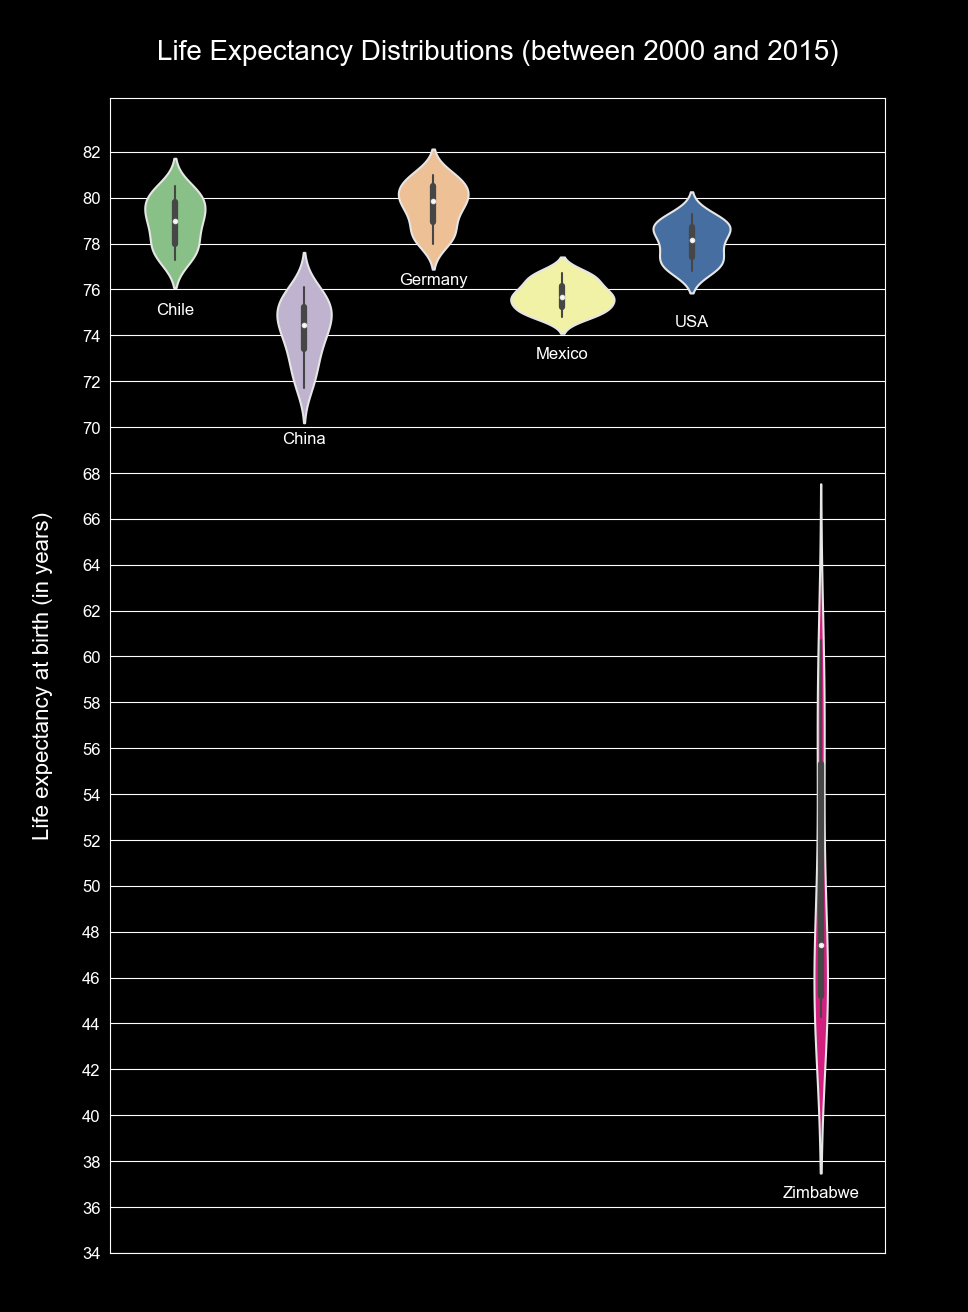

In [17]:
# Set color palette
sns.set_palette('Accent')
# Set style
sns.set_style('darkgrid', {'axes.facecolor':'black', 'figure.facecolor':'black'})

# Create figure and axes
plt.figure(figsize=(10, 15))

# Use Seaborn to create the violin plot
ax = sns.violinplot(data=df, x='Country', y='LEABY')
plt.setp(ax.collections, edgecolor='#e6e6e6')
# Add a title (using Matplotlib)
ax.set_title('\nLife Expectancy Distributions (between 2000 and 2015)\n', fontsize=20, color='white')

# Label x and y axises
ax.set_yticks(range(34, 84, 2))
ax.tick_params(axis='y', colors='white', labelsize=12)
ax.set(xticklabels=[])
ax.set(xlabel=None)
ax.set_ylabel('\nLife expectancy at birth (in years)\n', fontsize=16, color='white')

# --------- Country name text boxes

# Create a countries minimum LEABY values DataFrame, use when setting Country name text boxes y and x locations
df_LEABY_min = pd.DataFrame({'country': df.Country.unique(),
                             'LEABY_min': df.groupby('Country')['LEABY'].min().reset_index(drop=True)})

# plot Country name text boxes
for i in range(len(df_LEABY_min.index)):
    # Assign the y location Country name text box subtractor value for each county
    if df_LEABY_min.country.loc[i] == 'Zimbabwe':
        y_axis_sub = 7.9
    elif df_LEABY_min.country.loc[i] == 'Mexico':
        y_axis_sub = 1.8
    elif df_LEABY_min.country.loc[i] == 'Germany':
        y_axis_sub = 1.8
    else:
        y_axis_sub = 2.4
    # plot Country name text boxes yx locations and style
    ax.text(i, 
            df_LEABY_min.LEABY_min.loc[i] - y_axis_sub,
            df_LEABY_min.country.loc[i],
            ha='center',
            size=12,
            color='white',
            bbox=dict(edgecolor='None', facecolor='None'))

# place an empty text box in upper left axes coords, to match to the figure right padding  
ax.text(1.09, -0.04, ' ', transform=ax.transAxes, bbox=dict(facecolor='black', edgecolor='black'))
    
# Note: save figure before using show(), if not the result is a blank image 
# also savefig overrides the facecolor for the background of the figure, need to save fg with .get_facecolor() 
plt.savefig('charts/distribution_leaby_violinchart.png', facecolor=ax.get_facecolor())
plt.show()

# Restore all RC params to default settings
sns.reset_defaults()
plt.close()

<b>Focus question:</b> "What is the average life expectancy in these nations?"   

In [18]:
# Countries average LEAB
df_avg_period_15y_LEABY = pd.DataFrame({'LEABY_avg': df.groupby('Country')['LEABY'].mean()}).reset_index()

df_avg_period_15y_LEABY.to_csv('data/avg_period_15y_LEABY.csv')

print('\nThe average life expectancy at birth, in the 15 year period 2000-20015:\n')

df_avg_period_15y_LEABY.sort_values(by='LEABY_avg', ascending=False).reset_index(drop=True).head(6)


The average life expectancy at birth, in the 15 year period 2000-20015:



,Country,LEABY_avg
0,Germany,79.65625
1,Chile,78.94375
2,USA,78.06250
3,Mexico,75.71875
4,China,74.26250
5,Zimbabwe,50.09375


<b>Focus Question:</b> “What is the distribution of that life expectancy?”<br>
<br>
Based on the chart above, Chile and Germany's distribution LEABY (2000-2015) figures are very similar, with Germany having a little denser concentration of LEABY at 80 years, and their averages (2000-2015) LEABY being roughly the same.<br>
Chile LEABY distribution spreads between 76 and 81.5 years compared to Germany with a LEABY distribution spread between 76.9 and 82 years.<br>
<br>
The US distribution LEABY (2000-2015)  figure is remarkably similar in shape to the Germany distribution LEABY (2000-2015)  figure, but with the US having its highest concentration of LEABY at 78.5 years instead of 80 years and with the US having almost no LEABY higher than 80 years. The US average (2000-2015) LEBAY is roughly 1.5 years lower than the Germany average (2000-2015) LEBAY.<br>
The US LEABY distribution spreads between 76 and 81.5 years compared to Germany with a LEABY distribution spread between 76.9 and 80.3 years.<br>
<br>
Mexico and China have roughly an average (2000-2015) LEBAY of 74 years and 75.5 years respectively. China has a more broadly distributed LEABY between 70 and 77.5 years, compared to Mexico with a distribution spread between 74 and 77.5 years.<br> 
Mexico highest concentration of LEABY is at 75.5 years.<br>
<br>
Zimbabwe has the most spread out distribution LEABY (2000-2015) shape, from 37.5 to 67.5 years. It has also the lowest average (2000-2015) LEBAY at 50 years.

## Step 7. Bar Plots Of GDP and Life Expectancy over time

We want to compare the GDPs of the countries over time, in order to get a sense of the relationship between GDP and life expectancy. 

First, can plot the progession of GDP's over the years by country in a barplot using Seaborn.
We have set up a figure with the correct dimensions for your plot. Under that declaration:

Since our GDP is in trillions of US dollars, make sure your Y label reflects that by changing it to `"GDP in Trillions of U.S. Dollars"`.


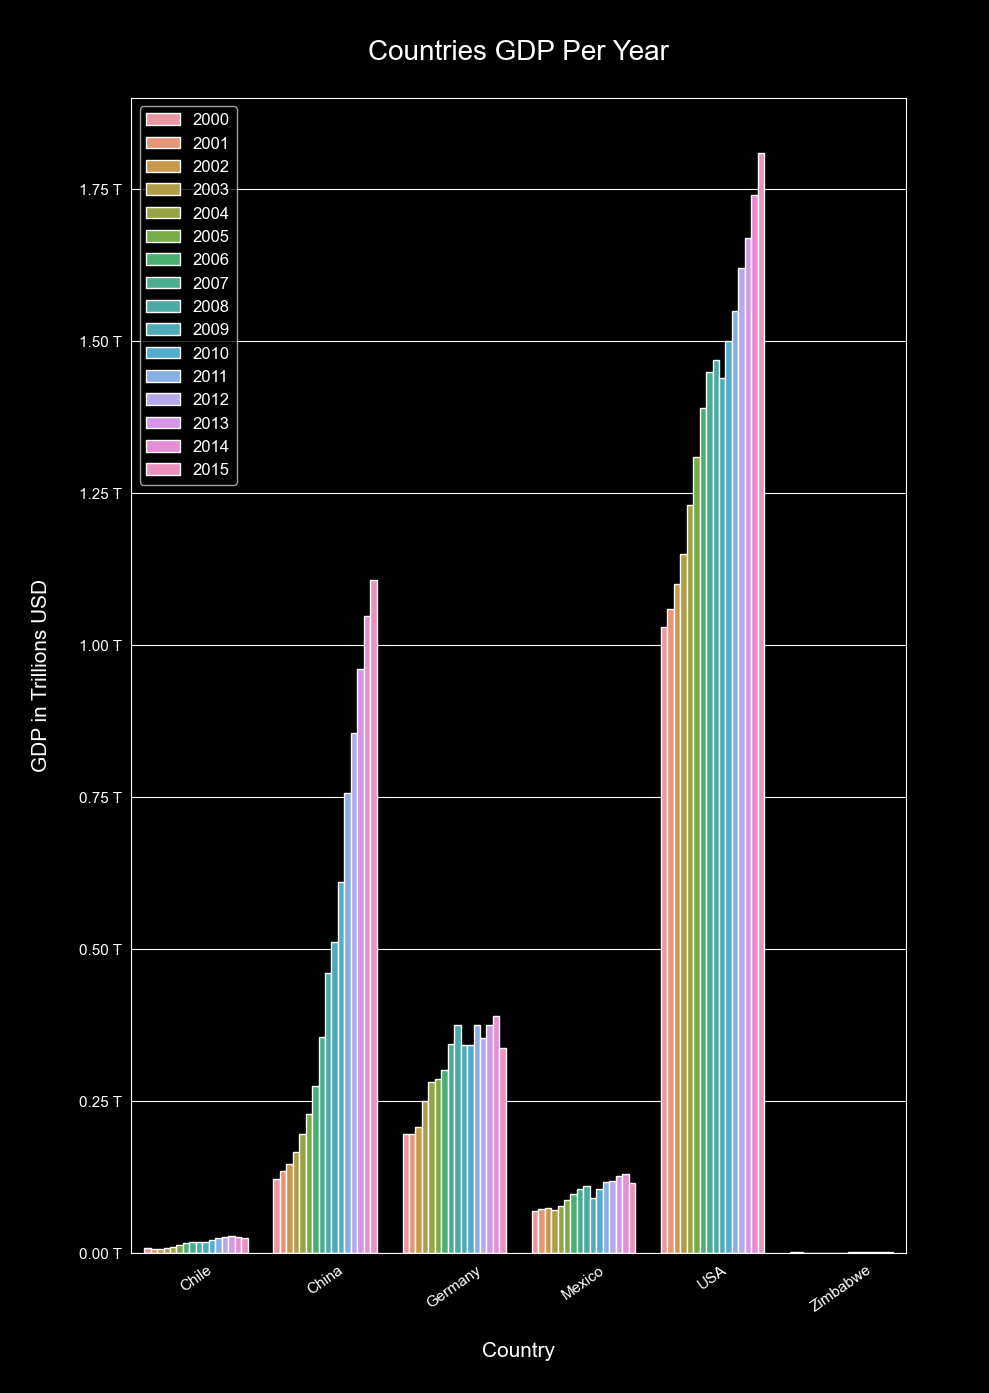

In [19]:
# Set style
sns.set_style('darkgrid', {'axes.facecolor':'black', 'figure.facecolor':'black'})

# Create figure and axes
plt.figure(figsize=(10, 15))


# Use Seaborn to create the bar plot, GDP in Trillions USD
ax = sns.barplot(data=df, x='Country', y=df.GDP*1e-3, hue="Year")

# Add a title 
ax.set_title('\nCountries GDP Per Year\n', fontsize=20, color='white')

# Label x and y axes 
ax.set_xlabel('\nCountry\n', fontsize=15, color='white')
ax.set_ylabel('\nGDP in Trillions USD\n', fontsize=15, color='white')
plt.xticks(rotation=35)

# ticks
ax.tick_params(axis='both', colors='white', labelsize=11)
# Add billion unit
fmt = '{x:,.2f} T'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Legend to the left
legend = plt.legend(loc=2, fontsize=12)
plt.setp(legend.get_texts(), color='w')

# place an empty text box in upper left axes coords, to match to the figure right padding  
ax.text(1.09, 1, ' ', transform=ax.transAxes, bbox=dict(facecolor='black', edgecolor='black'))

# Note: save figure before using show(), if not the result is a blank image
# also savefig overrides the facecolor for the background of the figure, need to save fg with .get_facecolor()
plt.savefig('charts/gdp_per_year_barchart.png', facecolor=ax.get_facecolor())
plt.show()

# Restore default settings
sns.reset_defaults()
plt.close()

In [20]:
# countries GDP growth rate (2000-20015) DataFrame
df_gdp_growth_rate = pd.DataFrame({'Country': df.Country.unique(), 
                                   'gdp_2000': df.loc[(df['Year']==2000), 'GDP'].values,
                                   'gdp_2015': df.loc[(df['Year']==2015), 'GDP'].values})
# GDP growth rate per country
df_gdp_growth_rate['growth_rate']= (df_gdp_growth_rate.gdp_2015 - df_gdp_growth_rate.gdp_2000)/df_gdp_growth_rate.gdp_2000

df_gdp_growth_rate.to_csv('data/gdp_growth_rate.csv')

print('\nCountries GDP growth rate, in the 15 years period 2000-2015')

df_gdp_growth_rate.sort_values(by='growth_rate', ascending=False).reset_index(drop=True).head(6)


Countries GDP growth rate, in the 15 years period 2000-2015


,Country,gdp_2000,gdp_2015,growth_rate
0,China,121.135000,1106.470000,8.134189
1,Chile,7.786093,24.251800,2.114758
2,Zimbabwe,0.668996,1.630467,1.437186
3,USA,1030.000000,1810.000000,0.757282
4,Germany,194.995000,337.561000,0.731126
5,Mexico,68.364800,115.226000,0.685458


<b>Focus question:</b> "Has GDP increased over time in the six nations?"<br>
<br>
All the countries listed on the chart had a GDP growth between 2000 and 2015.<br>
In the 15 year period 2000-2015, China had a gigantic exponential GDP growth, with a growth rate of 8.13.<br> 
In other words, China grew 813% between 2000 and 2015 compared to the US with 75% growth between 2000 and 2015.<br>
Chile had significant 211% growth between 2000 and 2015.<br>
Most countries had their GDP drop in 2009 with the exception of China and Zimbabwe (see Zimbabwe GDP (in Billions USD)).<br>
After 2009 Germany had erratic GDP levels, dropping and rising almost from one year to another, with a significant drop in 2015. 

Now that we have plotted a barplot that clusters GDP over time by Country, let's do the same for Life Expectancy.

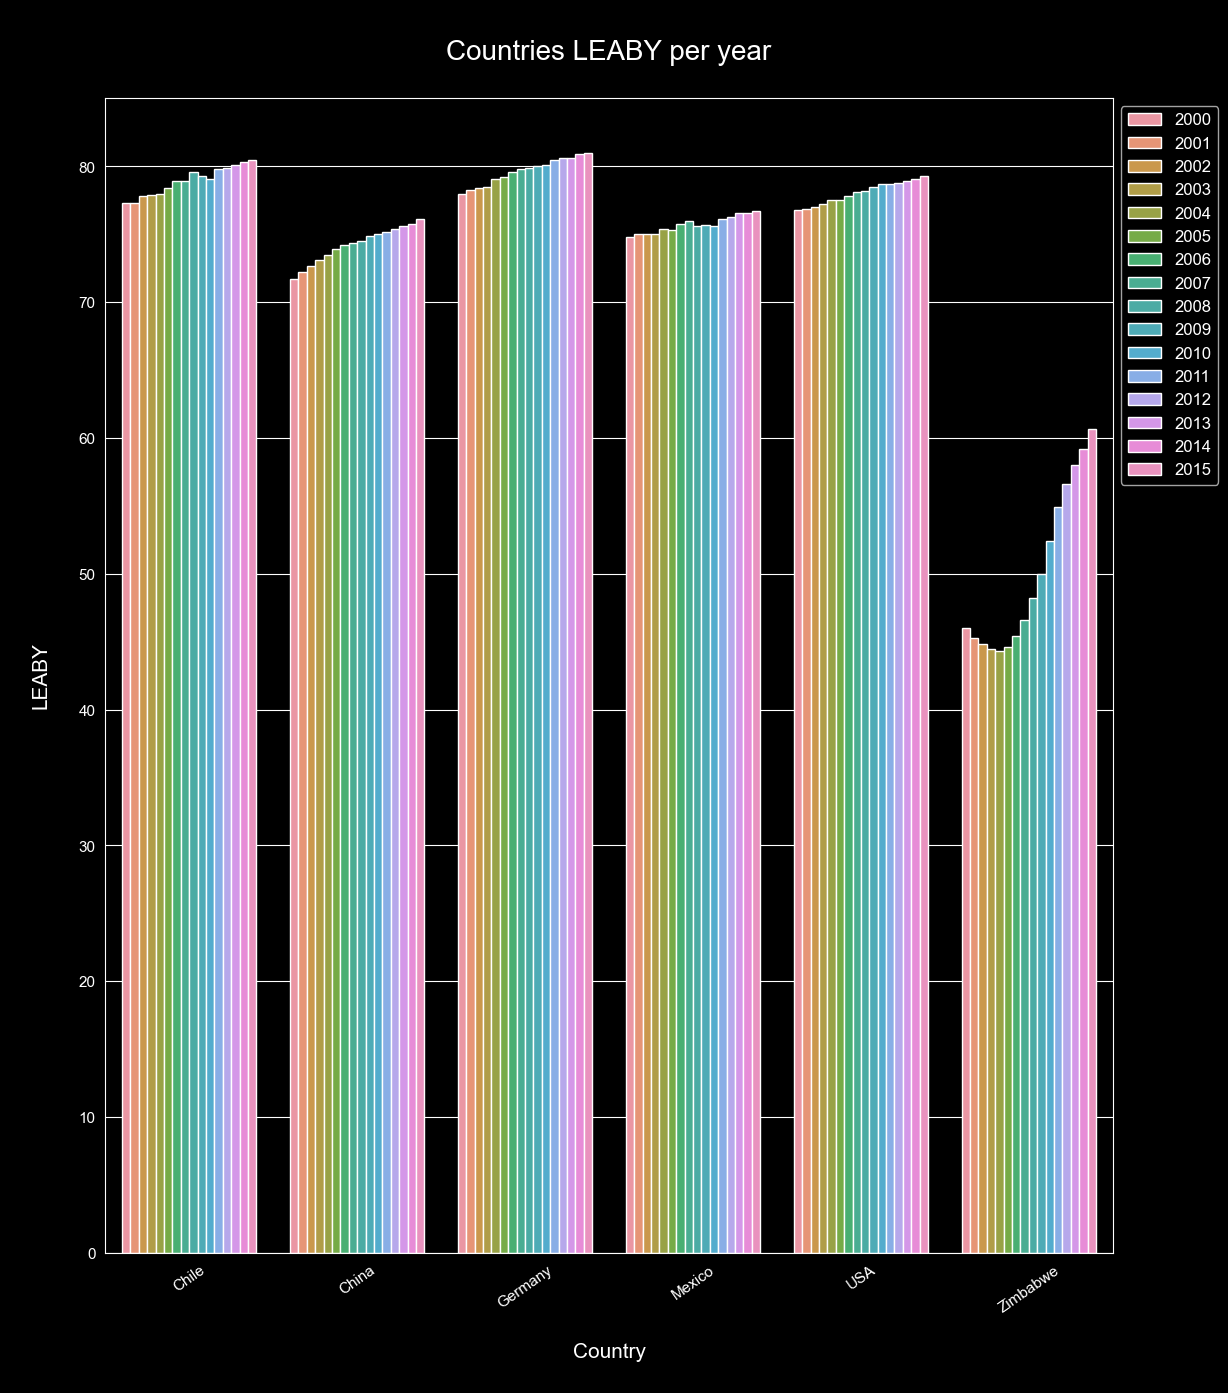

In [21]:
# Set style
sns.set_style('darkgrid', {'axes.facecolor':'black', 'figure.facecolor':'black'})

# Create figure and axes
plt.figure(figsize=(13, 15))


# Use Seaborn to create the bar plot
ax = sns.barplot(data=df, x='Country', y='LEABY', hue="Year")

# Add a title 
ax.set_title('\nCountries LEABY per year\n', fontsize=20, color='white')

# ticks
ax.tick_params(axis='both', colors='white', labelsize=11)
# Label x and y axes 
ax.set_xlabel('\nCountry\n', fontsize=15, color='white')
ax.set_ylabel('\nLEABY\n', fontsize=15, color='white')
plt.xticks(rotation=35)

# Legend to the location
legend = plt.legend(bbox_to_anchor=(1, 1), fontsize=12)
plt.setp(legend.get_texts(), color='w')

# Note: save figure before using show(), if not the result is a blank image
plt.savefig('charts/leaby_per_year_barchart.png', facecolor=ax.get_facecolor())
plt.show()

# Restore to default settings
sns.reset_defaults()
plt.close()

<b>Focus question:</b> "Has life expectancy increased over time in the six nations?"<br>
<br>
The LEABY increased over time in all six countries, but Zimbabwe has had the most significant growth of LEABY, with a growth of 32% LEABY between 2000 and 2015. It is important to note that Zimbabwe also experienced a decrease of LEABY between 2000 and 2004.

In [22]:
# countries LEABY growth rate (2000-20015) DataFrame
df_leaby_growth_rate = pd.DataFrame({'Country': df.Country.unique(), 
                                   'leaby_2000': df.loc[(df['Year']==2000), 'LEABY'].values,
                                   'leaby_2015': df.loc[(df['Year']==2015), 'LEABY'].values})
# GDP growth rate per country
df_leaby_growth_rate['growth_rate'] = (df_leaby_growth_rate.leaby_2015 - df_leaby_growth_rate.leaby_2000)/ \
    df_leaby_growth_rate.leaby_2000

df_leaby_growth_rate.to_csv('data/leaby_growth_rate.csv')

print('\nCountries LEABY growth rate, in the 15 year period 2000-2015')

df_leaby_growth_rate.sort_values(by='growth_rate', ascending=False).reset_index(drop=True).head(6)


Countries LEABY growth rate, in the 15 year period 2000-2015


,Country,leaby_2000,leaby_2015,growth_rate
0,Zimbabwe,46.0,60.7,0.319565
1,China,71.7,76.1,0.061367
2,Chile,77.3,80.5,0.041397
3,Germany,78.0,81.0,0.038462
4,USA,76.8,79.3,0.032552
5,Mexico,74.8,76.7,0.025401


<i>--- Added Personal Task, curious about Zimbabwe LEABY.</i>

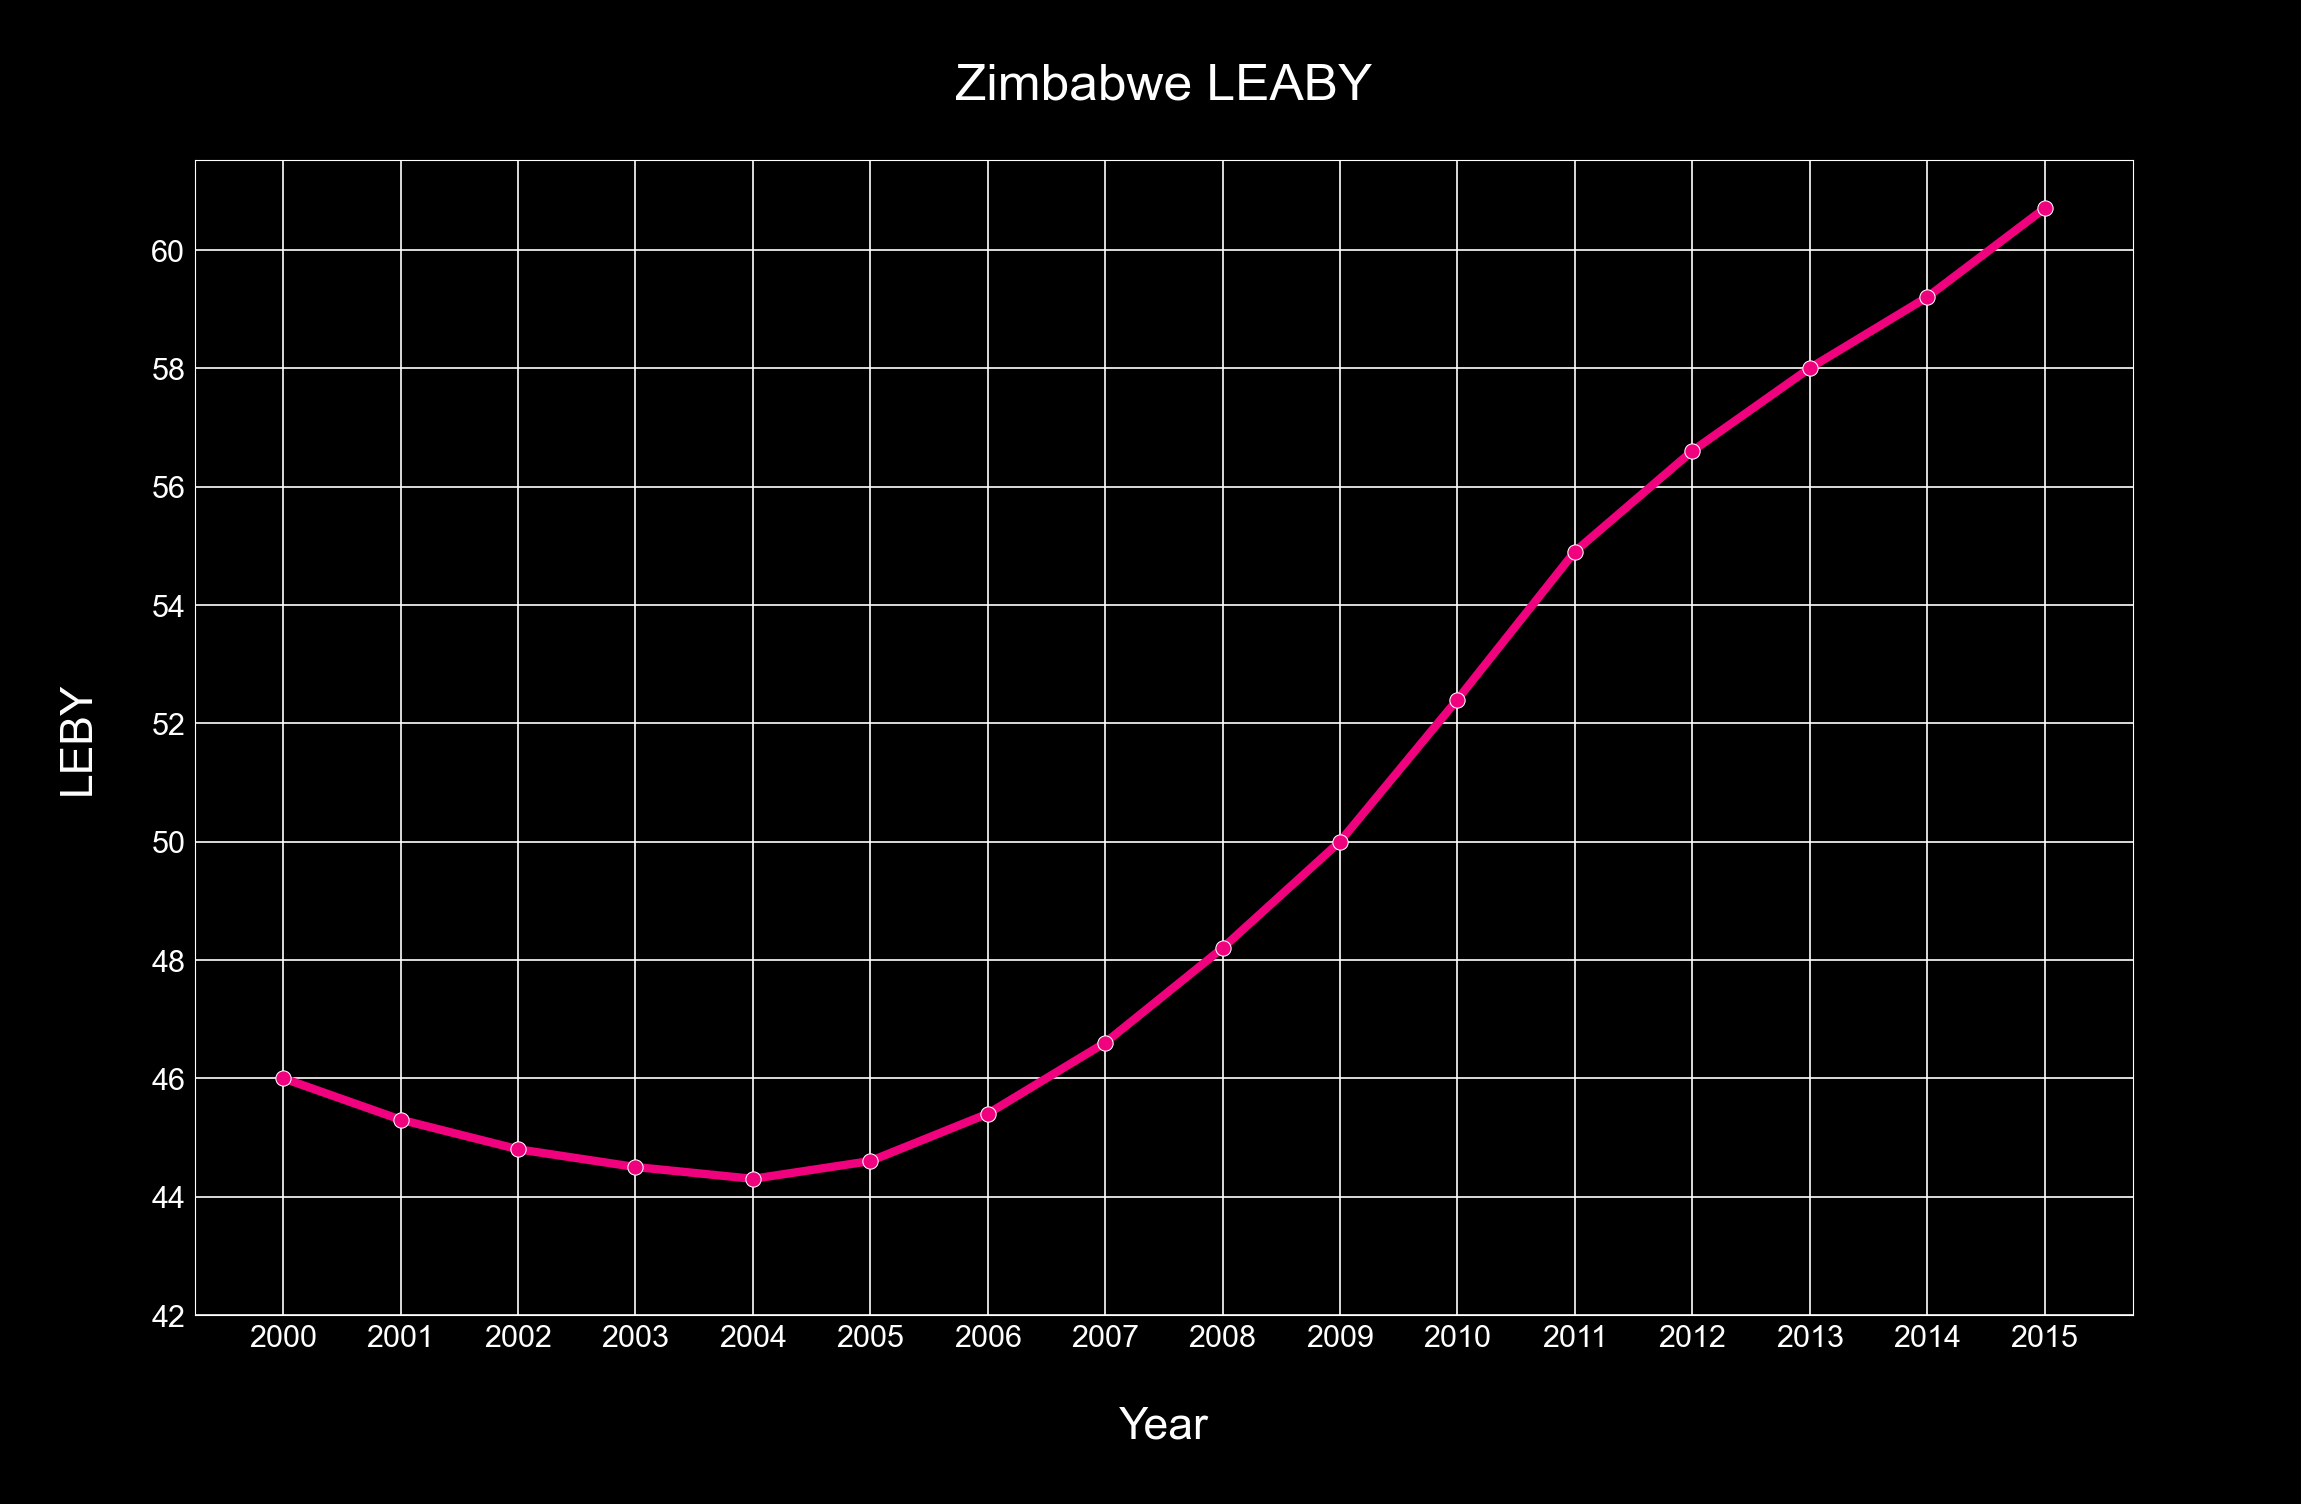

In [23]:
# Set style
sns.set_style('darkgrid', {'axes.facecolor':'black', 'figure.facecolor':'black'})

# Create figure 
plt.figure(figsize=(25, 15))

# Use Seaborn to create the bar plot
sns.set_context( rc={'grid.linewidth': 1.2, 'lines.linewidth': 6, 'lines.markersize': 11})
ax = sns.lineplot(data=df_zimbabwe, x='Year', y='LEABY', marker='o', 
                  color=(df_country_color.color_hex[df_country_color['country']=='Zimbabwe'].values)[0], 
                  ci=None)

# Setting x ticks to a years list
years = df_zimbabwe.Year.values
ax.tick_params(axis='both', colors='white', labelsize=22)
ax.set_xticks(years)
ax.set_yticks(range(42, 62, 2))

# Add a title 
ax.set_title('\nZimbabwe LEABY\n', fontsize=37, color='white')


# Label x and y axes 
ax.set_xlabel('\nYear\n', fontsize=32, color='white')
ax.set_ylabel('\nLEBY\n', fontsize=32, color='white')

# place an empty text box in the upper left axes coords, to match to the figure right padding  
ax.text(1.08, 1, ' ', transform=ax.transAxes, bbox=dict(facecolor='black', edgecolor='black'))

# Note: save figure before using show(), if not the result is a blank image
# also savefig overrides the facecolor for the background of the figure, need to save fg with .get_facecolor()
plt.savefig('charts/year_leaby_zimbabwe_linechart.png', facecolor=ax.get_facecolor())
plt.show()

# Restore all to default settings
sns.reset_defaults()
plt.close()

What are your first impressions looking at the visualized data?

- Which countries' bars changes the most?
- What years are there the biggest changes in the data?
- Which country has had the least change in GDP over time? 
- How do countries compare to one another?
- Now that you can see the both bar charts, what do you think about the relationship between GDP and life expectancy?
- Can you think of any reasons that the data looks like this for particular countries?

Note: You've mapped two bar plots showcasing a variable over time by country, however, bar charts are not traditionally used for this purpose. In fact, a great way to visualize a variable over time is by using a line plot. While the bar charts tell us some information, the data would be better illustrated on a line plot.  We will complete this in steps 9 and 10, for now let's switch gears and create another type of chart.

- Question: "Which countries' bars changes the most?"<br>

   In GDP<br>
    China had the largest growth in GDP, 813%.<br>
    Zimbabwe had a drop in GDP from 2000 to 2008, and then its GDP grew 269%.<br>
    After 2009, Germany had erratic GDP levels.<br>
 
   In LEABY:<br>
    Zimbabwe had a growth of 32% LEABY from 2000 to 2015,<br>
    but Zimbabwe also experienced a decrease of LEABY between 2000 and 2004,<br>
    and it has the lowest average (2000-2015) LEABY at 50 years. <br>
<br>    
- Question: "What years are there the biggest changes in the data?"<br>
<br>
   The biggest changes of data occurred in the GDPs of China, Chile and the US, and in the Zimbabwe LEABY.<br>
<br>    
- Question: "Which country has had the least change in GDP over time?"<br>

   Mexico experienced the least change of all the countries both in its GDP and LEABY, 68% and 4% respectively.<br>
<br>  
- Question: "How do countries compare to one another?"<br>
    
    In GDP:<br>
     Overtime, the US had a significantly higher GDP than all other countries.<br>
     China had a gigantic GDP growth compared to all other countries.<br>
     Chile had very low GDP compared to the US, but it had a significant GDP growth of 211%.<br>
     Zimbabwe had an extremely low GDP compared to all other countries.<br> 
  
    In LEABY:<br>
     Overtime, Zimbabwe had the most significant increase of LEABY, but it had a very low average LEABY growth compared to all other countries.<br>
     Germany had the highest average LEABY at 80 years.<br>
<br> 
   Mexico, compared to all other countries, had an average in the low range for its GDP and in the low-medium range for its LEABY,<br>
   with an averarge GDP of 97.6 milions USD and an average LEABY of 75.7 years.  
<br>  
- <b>Focuse question:</b> "Now that you can see the both bar charts, what do you think about the relationship between GDP and life expectancy?"<br>
   
    For most of the countries where the data was provided,<br> 
    there does not seem to be a correlation between the countries GDPs and their LEABYs.  Zimbabwe is the exception.<br>
    A correlation may exist between low LEABY and countries with extremely low GDPs, but the provided datasets are not
    substantial enough, with Zimbabwe been the only country with an extremely low GDP, 
    to show, as a general rule, the existence of a real correlation between the countries GDPs and their LEABYs.<br>
    The data from Zimbabwe shows that the decrease or the increase of its LEABY is somehow connected with the growth and 
    the decline of its GDP during the period of 2000-2015.<br>
    The data seems to show that a major event affected Zimbabwe GDP and LEABY during the 2000-2008 period.<br>
<br>    
- Question: "Can you think of any reasons that the data looks like this for particular countries?"<br>
    
    Most countries GDPs dropped in 2008-09, during that period, the world was experiencing a worldwide financial and automobile crisis.<br>
    Zimbabwe had its GDP and LEABY drop between 2000 and 2004, during that period, Zimbabwe was experiencing violent civil unrest.

## Step 8. Scatter Plots of GDP and Life Expectancy Data

To create a visualization that will make it easier to see the possible correlation between GDP and life expectancy, you can plot each set of data on its own subplot, on a shared figure.

Create a multiple plots for comparison, using `FacetGrid`.

1. In this graph, we want GDP on the X axis and Life Expectancy on the Y axis.
2. We want the columns to be split up for every Year in the data
3. We want the data points to be differentiated (hue) by Country.
4. We want to use a Matplotlib scatter plot to visualize the different graphs


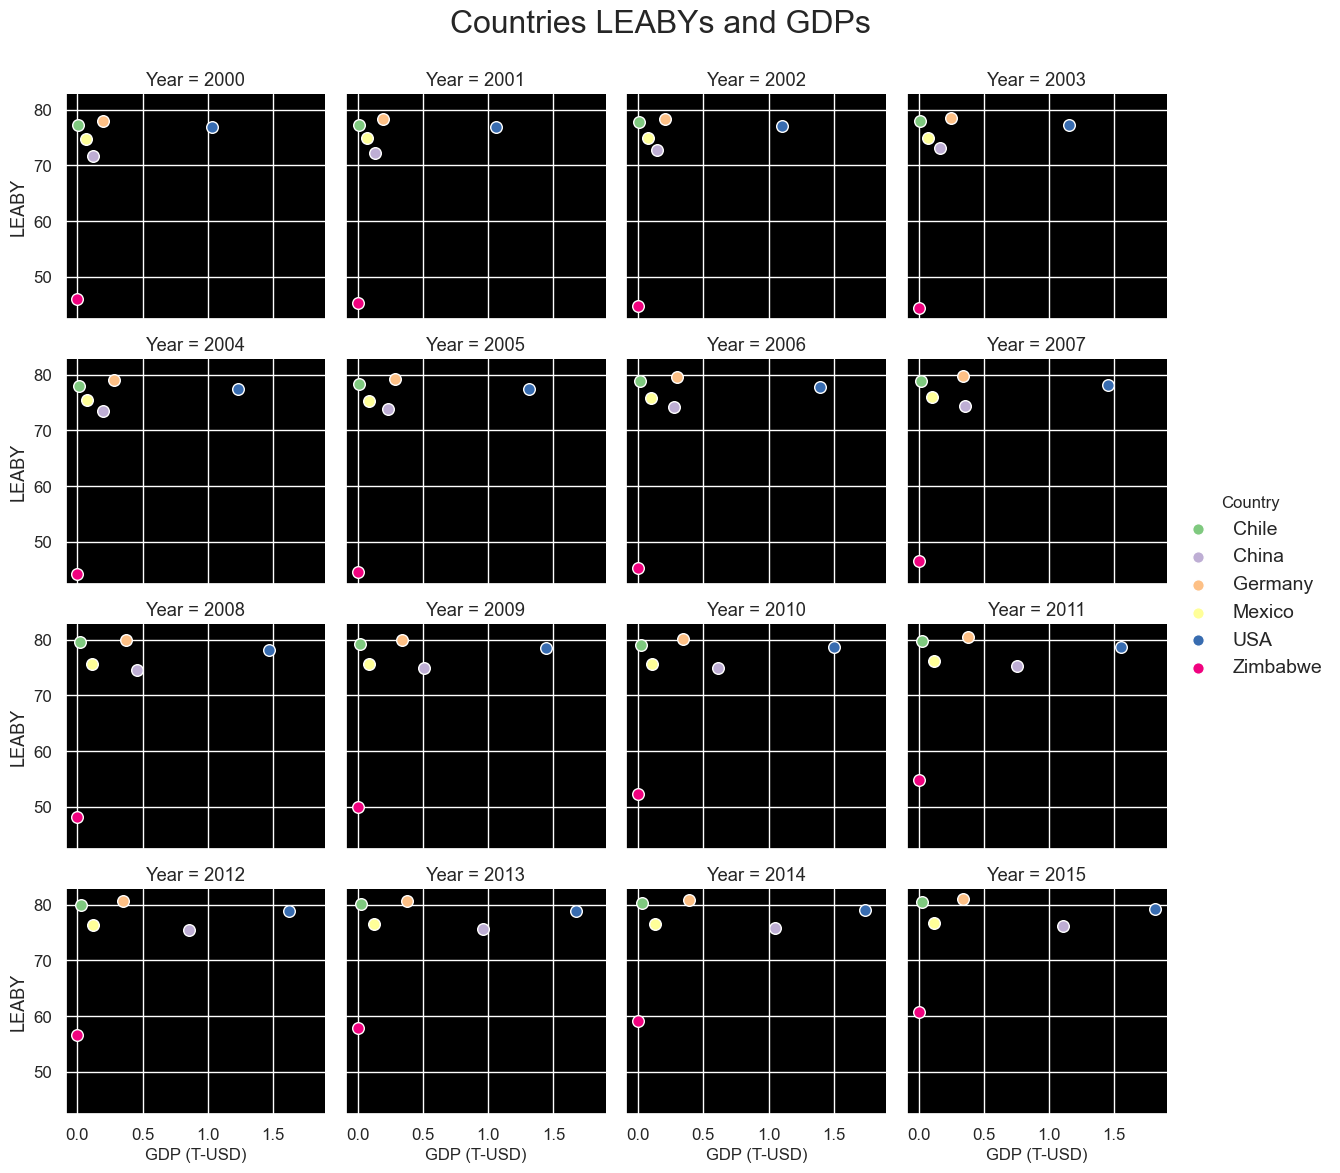

In [24]:
# Personal preferences font scale
sns.set(font_scale=1.1)

# Set style and color palette
sns.set_style('darkgrid', {'axes.facecolor':'black'})
sns.set_palette('Accent')

# grid
# gdp in Trillion
df.GDP=df.GDP*1e-3
g = sns.FacetGrid(data=df, col='Year', hue='Country', col_wrap=4)
g = g.map(plt.scatter, 'GDP', 'LEABY', edgecolor='w', s=70).add_legend(fontsize=14)
# gdp in million personel preference
df.GDP=df.GDP*1e+3

# Personal preferences x and y labels
g.set_xlabels('GDP (T-USD)', fontsize=12)
g.set_ylabels('LEABY', fontsize=13)

# Add a Title to the grid
plt.subplots_adjust(top=0.91)
g.fig.suptitle('Countries LEABYs and GDPs', fontsize=23) 

# Note: save figure before using show(), if not the result is a blank image
plt.savefig('charts/gdp_leaby_facetgrid_scatter.png')
plt.show()

# Restore all to default settings
sns.reset_defaults()
plt.close()

+ Which country moves the most along the X axis over the years?
+ Which country moves the most along the Y axis over the years?
+ Is this surprising?
+ Do you think these scatter plots are easy to read? Maybe there's a way to plot that! 

- China had the largest motion on the X axis, with a GDP growth of 813%.
      
- Zimbabwe had the largest motion on the Y axis, with LEABY growth of 32%.
      
- It is not surprising. During the 2000-2015 period, China had the largest GDP growth and Zimbabwe had the largest LEABY growth.
                 
- Scatter plots are a good tool to visualize the distribution of the combine countries GDPs and LEABYs per year, but it makes it difficult to see the individual evolution of the country GDPs and LEABYs over the years. Line plots would be a more suitable choice for that purpose.

## Step 9. Line Plots for Life Expectancy

In the scatter plot grid above, it was hard to isolate the change for GDP and Life expectancy over time. 
It would be better illustrated with a line graph for each GDP and Life Expectancy by country. 

FacetGrid also allows you to do that! Instead of passing in `plt.scatter` as your Matplotlib function, you would have to pass in `plt.plot` to see a line graph. 

Here are the instructors to fill in the blanks from the commented word bank:

1. In this graph, we want Years on the X axis and Life Expectancy on the Y axis.
2. We want the columns to be split up by Country
3. We want to use a Matplotlib line plot to visualize the different graphs


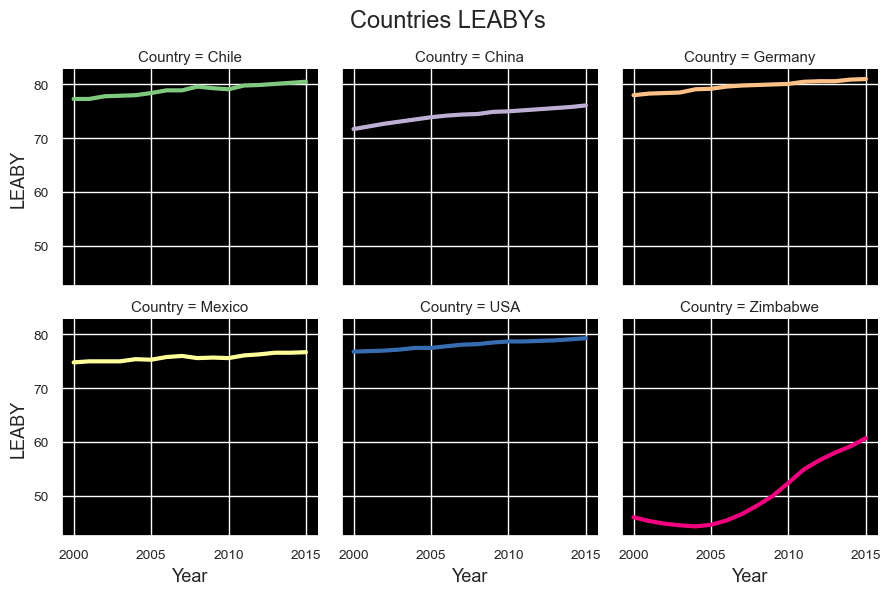

In [30]:
# Personal preferences font scale
sns.set(font_scale=.9)

# Set style and color palette
sns.set_style('darkgrid', {'axes.facecolor': 'black'})

# grid Chart
g = sns.FacetGrid(data=df, col='Country', col_wrap=3)
g = g.map(plt.plot, 'Year', 'LEABY')

# assign line color to corresponding country
for i in range(6):
    ax = g.facet_axis(0,i) # could also do ax=g.axes[0,0]
    # get the relevant Line2D object 
    l = ax.get_lines()[0] 
    l.set_linewidth(3)
    l.set_color(df_country_color.color_hex[i])
    # Add white border to line
    l.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'), path_effects.Normal()])

# Personal preferences x and y labels
g.set_xlabels('Year', fontsize=13)
g.set_ylabels('LEABY', fontsize=13)

# Add a Title to the grid
plt.subplots_adjust(top=0.88)
g.fig.suptitle('Countries LEABYs', fontsize=17) 

# Note: save figure before using show(), if not the result is a blank image
plt.savefig('charts/leaby_facetgrid_line.png')
plt.show()

# Restore all to default settings
sns.reset_defaults()
plt.close()


What are your first impressions looking at the visualized data?

- Which countries' line changes the most?
- What years are there the biggest changes in the data?
- Which country has had the least change in life expectancy over time? 
- Can you think of any reasons that the data looks like this for particular countries?

- Zimbabwe had the most change in LEABY, with a LEABY growth of 32%.

- All the countries LEABYs increased between 2000 and 2015, but Zimbabwe experienced a decrease of LEABY between 2000 and 2004, and a radical increase between 2005 and 2015.
      
- Mexico had the least change in LEABY, with a LEABY gowth of 2.5%.
                  
- All the countries benefited from advancements in medical technology resulting in a LEABY growth in all the countries. Zimbabwe experienced a violent civil unrest between 1999 and 2006, affecting greatly their LEABY during that period.<br>
Mexico did not experience political unrest and had no major changes in its health care system, resulting in the smallest LEABY growth.

- China's gigantic GDP increase probably had an influence on its citizens access to and quality of health care.<br> 
China experienced a slight LEABY increase, with a 6% LEABY growth. 

## Step 10. Line Plots for GDP

Let's recreate the same FacetGrid for GDP now. Instead of Life Expectancy on the Y axis, we now we want GDP.

Once you complete and successfully run the code above, copy and paste it into the cell below. Change the variable for the X axis. Change the color on your own! Be sure to show your plot.


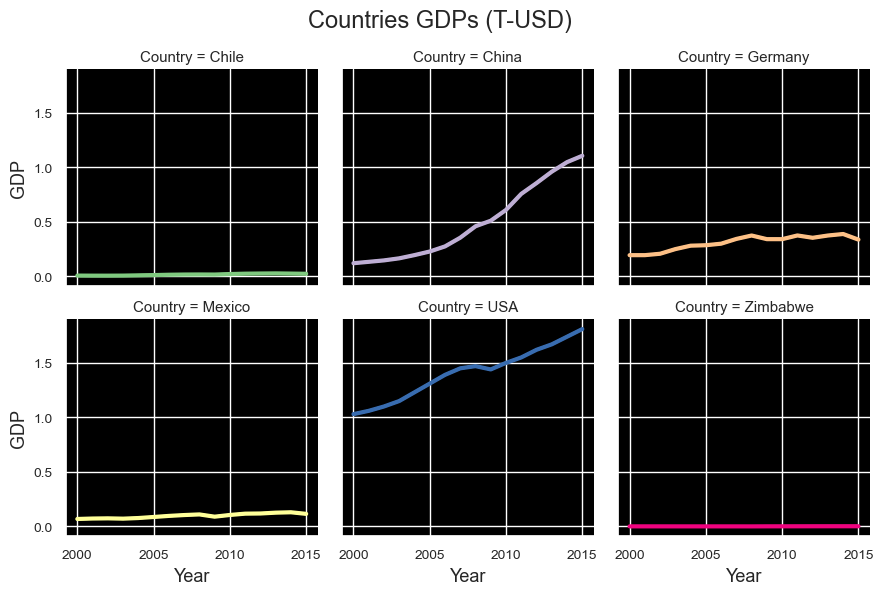

In [26]:
# Personal preferences font scale
sns.set(font_scale=.9)

# Set style and color palette
sns.set_style('darkgrid', {'axes.facecolor': 'black'})

# grid Chart
# gdp in Trillions
df.GDP=df.GDP*1e-3
g = sns.FacetGrid(data=df, col='Country', col_wrap=3)
g = g.map(plt.plot, 'Year', 'GDP')
# gdp in Billions personel preference
df.GDP=df.GDP*1e+3

# assign line color to corresponding country
for i in range(6):
    ax = g.facet_axis(0,i) # could also do ax=g.axes[0,0]
    # get the relevant Line2D object 
    l = ax.get_lines()[0] 
    l.set_linewidth(3)
    l.set_color(df_country_color.color_hex[i])
    # Add white border to line
    l.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'), path_effects.Normal()])


# Personal preferences x and y labels
g.set_xlabels('Year', fontsize=13)
g.set_ylabels('GDP', fontsize=13)

# Add a Title to the grid
plt.subplots_adjust(top=0.88)
g.fig.suptitle('Countries GDPs (T-USD)', fontsize=17) 

# Note: save figure before using show(), if not the result is a blank image
plt.savefig('charts/GDPt_facetgrid_line.png')
plt.show()

# Restore all to default settings
sns.reset_defaults()
plt.close()

The significant difference of GDP size between some of the countries makes the comparative visualization of the GDP evolution over time between those countries difficult to see.<br>
For example, between the US and Zimbabwe, in the chart above, the US GDP evolution overtime is readable, but the Zimbabwe GDP evolution overtime seems not to evolve and to have a value of zero.<br>
A rescaling of the y axis relative to each individual countries GDP will allow a better visualization of the countries GDP evolution relative to each other.

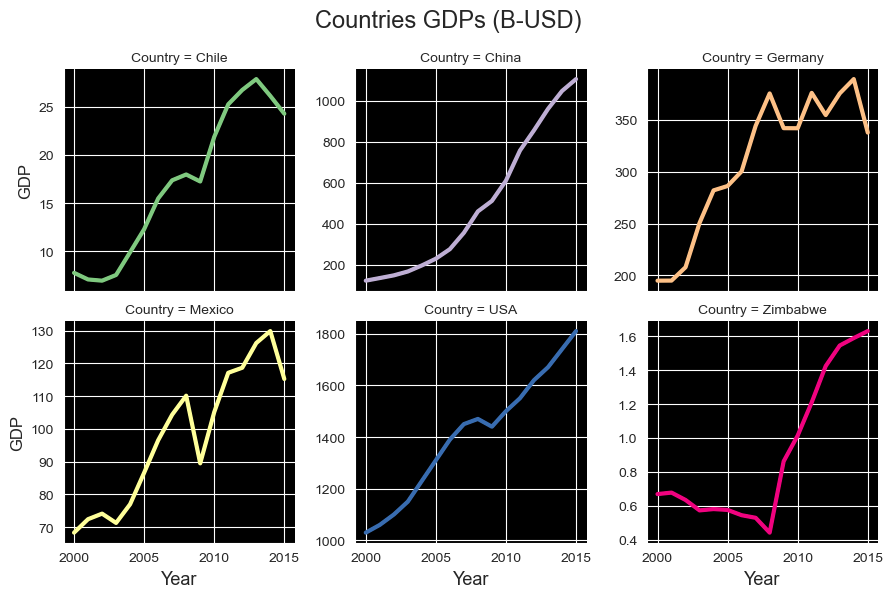

In [27]:
# Set style and color palette
sns.set_style('darkgrid', {'axes.facecolor': 'black'})

# grid Chart
# adding the argument sharey = False to .FacetGrid() scales each the Y axes to the each country data
g = sns.FacetGrid(data=df, col='Country', col_wrap=3, sharey = False)
g = g.map(plt.plot, 'Year', 'GDP')

# assigne line color to corresponding country
for i in range(6):
    ax = g.facet_axis(0,i) # could also do ax=g.axes[0,0]
    # get the relevant Line2D object 
    l = ax.get_lines()[0] 
    l.set_linewidth(3)
    l.set_color(df_country_color.color_hex[i])
    # Add white border to line
    l.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'), path_effects.Normal()])

# Personal preferences x and y labels
g.set_xlabels('Year', fontsize=13)
g.set_ylabels('GDP', fontsize=12)

# Add a Title to the grid
plt.subplots_adjust(top=0.88)
g.fig.suptitle('Countries GDPs (B-USD)', fontsize=17) 

# Note: save figure before using show(), if not the result is a blank image
plt.savefig('charts/GDPb_facetgrid_line.png')
plt.show()

# Restore all to default settings
sns.reset_defaults()
plt.close()

Which countries have the highest and lowest GDP?

The GDP grid chart clearly shows that over the years the US had the highest GDP, with its highest GDP over 1,800 Billions USD in 2015.<br>
Zimbabwe had constantly the lowest GDP, with its lowest GDP under 0.5 Billions USD in 2008.

<i>--- Added Personal Task, countries highest and lowest GDPs.</i>

In [28]:
# DatatFrame GDP max and min
df_country_gdp_max_min = pd.DataFrame({'gdp_max': df.groupby('Country')['GDP'].max()}).reset_index()

df_country_gdp_max_min['gdp_min'] = df.groupby('Country')['GDP'].min().reset_index(drop=True)

df_country_gdp_max_min.to_csv('data/country_gdp_max_min.csv')

df_country_gdp_max_min.sort_values(by='gdp_max', ascending=False).reset_index(drop=True).head(6)

,Country,gdp_max,gdp_min
0,USA,1810.000000,1030.000000
1,China,1106.470000,121.135000
2,Germany,389.061000,194.995000
3,Mexico,129.846000,68.364800
4,Chile,27.838400,6.973681
5,Zimbabwe,1.630467,0.441570


Which countries have the highest and lowest life expectancy?

The LEBY grid chart shows that over the years Germany had the highest LEABY, with its highest LEABY over 80 in 2015.<br>
Zimbabwe had consistently the lowest LEABY, with its lowest LEABY under 45 in 2004.


<i>--- Added Personal Task, countries highest and lowest LEABYs.</i>

In [29]:
# DatatFrame LEABY max nad min
df_country_leaby_max_min = pd.DataFrame({'leaby_max': df.groupby('Country')['LEABY'].max()}).reset_index()

df_country_leaby_max_min['leaby_min'] = df.groupby('Country')['LEABY'].min().reset_index(drop=True)

df_country_leaby_max_min.to_csv('data/country_leaby_max_min.csv')

df_country_leaby_max_min.sort_values(by='leaby_max', ascending=False).reset_index(drop=True).head(6)

,Country,leaby_max,leaby_min
0,Germany,81.0,78.0
1,Chile,80.5,77.3
2,USA,79.3,76.8
3,Mexico,76.7,74.8
4,China,76.1,71.7
5,Zimbabwe,60.7,44.3


## Step 11 Researching Data Context 

Based on the visualization, choose one part the data to research a little further so you can add some real world context to the visualization. 

- Most countries had their GDP drop in 2008-09 with exception of China and Zimbabwe.
 
The 2009 drop in GDP was mostly caused by the financial crisis of 2007–2008, also known as the global financial crisis (GFC), 
was a severe worldwide financial crisis. Excessive risk-taking by banks combined with a downturn in the subprime lending market in the United States culminated with the bankruptcy of Lehman Brothers on September 15, 2008 and an international banking crisis.<br>
The crisis sparked the Great Recession, a global recession, it was the most severe recession since the Great Depression It was also followed by the European debt crisis, which began with a deficit in Greece in late 2009, and the 2008–2011 Icelandic financial crisis.<br>
   
The automotive industry crisis of 2008–2010 was also part of the financial crisis of 2007–2008 and the resulting Great Recession. The crisis affected European and Asian automobile manufacturers, but it was primarily felt in the American automobile manufacturing industry.<br>
  
Due to China and Zimbabwe not having a real banking loaning system, and having a small or no automotive industry in 2008-2009, the global financial crisis had little effects on their GDPs.<br>
   
After 2008 the automotive industry in China became the largest in the world measured by automobile unit production, today, the annual production of automobiles in China exceeds that of the European Union or that of the United States and Japan combined.<br><br>
    Source:<br>
        <a href="https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%932008">Financial crisis of 2007–2008</a><br>
        <a href="https://en.wikipedia.org/wiki/Automotive_industry_crisis_of_2008%E2%80%932010">Automotive industry crisis of 2008–2010</a><br>
        <a href="https://en.wikipedia.org/wiki/Automotive_industry_in_China#:~:text=The%20traditional%20%22Big%20Four%22%20domestic,Chery%20and%20Jianghuai%20(JAC).&text=By%202000%2C%20China%20was%20producing%20over%20two%20million%20vehicles.">Automotive industry in China</a><br>
<br>   
- The data shows, between 2000 and 2008, Zimbabwe was experiencing a decrease in its GDP and LEABY, with the sharpest decrease in GDP in 2008.
 
During that period of time, Zimbabwe experienced civil unrest, starting in 2000 by the seizure of hundreds of white-owned farms in a violent campaign supported by the government.<br>
  
-In 2001, the Finance Minister Simba Makoni acknowledges economic crisis, saying foreign reserves have run out and warning of serious food shortages.<br> 
Most western donors, including the World Bank and the IMF, cut aid because of President Mugabe's land seizure program.<br>
-In 2002, Zimbabwe parliament passed a law limiting media freedom.<br> 
The European Union imposes sanctions on Zimbabwe and the Commonwealth suspends Zimbabwe for a year. 
Shortly after the imposed sanctions were implemented, a state of disaster was declared as worsening food shortages threaten famine.<br>
-In 2005, tens of thousands of shanty dwellings and illegal street stalls are destroyed as part of a "clean-up" program.<br>
The UN estimates that the drive has left about 700,000 people homeless.<br>
-In 2006, Year-on-year inflation exceeds 1,000%.<br>
-In 2008, EU and US widen sanctions against Zimbabwe's leaders, Galloping price increases rendered Zimbabwe's currency nearly worthless by 2008, explaining the sharp drop of the 2008 GDP seen in the data.<br>
<br>
The data shows, between 2009 and 2015, Zimbabwe was experiencing an increase in its GDP and LEABY.<br>
    
-In 2009, the Zimbabwe Government allowed the use of foreign currencies to try stem hyperinflation.<br> 
Morgan Tsvangirai is sworn in as prime minister, after protracted talks over formation of a new government.<br> 
The IMF provided USD400M support as part of G20 agreement.<br>
-In 2010, Zimbabwe resumes official diamond sales.<br>
-In 2013, a new constitution approved by an overwhelming majority in a referendum.<br>
<br>
    Source: <a href="https://bbc.com/news/world-africa-14113618">Zimbabwe profile - Timeline</a>
<br>

## Step 12 Create Blog Post

Use the content you have created in this Jupyter notebook to create a blog post reflecting on this data. Include the following visuals in your blogpost:

- The violin plot of the life expectancy distribution by country
- The facet grid of scatter graphs mapping GDP as a function Life Expectancy by country
- The facet grid of line graphs mapping GDP by country
- The facet grid of line graphs mapping Life Expectancy by country

We encourage you to spend some time customizing the color and style of your plots! Remember to use plt.savefig("filename.png") to save your figures as a .png file.

When authoring your blog post, here are a few guiding questions to guide your research and writing:

- How do you think the histories and the cultural values of each country relate to its GDP and life expectancy?
- What would have helped make the project data more reliable? What were the limitations of the dataset?
- Which graphs better illustrate different relationships??

<b>Link to my Blog:</b> <a href="https://www.alex-ricciardi.com/post/life-expectancy-and-gdp">Life Expectancy and GDP Blog</a>